# **Project Name**    - Airline Flight Fare Prediction


##### **Project Type**    - EDA/supervised ML
##### **Contribution**    - Individual


# **Project Summary -**

**Project Title: Airline Flight Fare Prediction with EDA and Supervised Machine Learning**

**Project Summary:**

In the ever-evolving world of aviation, accurate pricing of airline tickets is crucial for both travelers and airlines alike. This project, "Airline Flight Fare Prediction," aims to develop a robust and accurate machine learning model to predict flight fares based on historical flight data and perform exploratory data analysis (EDA) to gain insights into the factors influencing ticket prices.

**Project Objectives:**

1. **Data Collection:** Gather a comprehensive dataset containing historical flight information, including routes, airlines, departure times, arrival times, stops, and, most importantly, ticket prices.

2. **Data Preprocessing:** Perform data preprocessing tasks, including data cleaning, handling missing values, encoding categorical variables, and feature engineering to prepare the dataset for model training.

3. **Exploratory Data Analysis (EDA):** Conduct in-depth EDA to gain insights into the dataset. Explore factors such as the impact of airlines, flight routes, departure times, and other variables on flight fares. Visualize key findings to communicate patterns and relationships effectively.

4. **Feature Selection:** Identify the most relevant features that influence flight fares using statistical methods or feature importance scores from machine learning models.

5. **Model Selection:** Choose the appropriate machine learning algorithm for regression, such as linear regression, decision trees, random forests, gradient boosting, or neural networks, to build the flight fare prediction model.

6. **Model Training:** Split the dataset into training and testing sets, and train the selected model on the training data.

7. **Model Evaluation:** Evaluate the model's performance using relevant regression metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

8. **Hyperparameter Tuning:** Optimize the model's hyperparameters to improve its predictive accuracy.


**Expected Outcomes:**

- A highly accurate machine learning model capable of predicting airline flight fares based on user inputs.
- Insights into the key factors influencing flight fares, which can be valuable for both travelers and airlines.
- A user-friendly interface or application for travelers to estimate flight fares in real-time.
- Comprehensive documentation for future reference and potential extensions of the project.

**Project Benefits:**

- Improved transparency in flight pricing for travelers.
- Enhanced competitiveness for airlines through optimized pricing strategies.
- Valuable insights for travelers to make informed decisions about their flights.
- Practical experience in data preprocessing, EDA, machine learning for project contributors.

The "Airline Flight Fare Prediction" project not only addresses a real-world problem but also provides a valuable opportunity to apply data science and machine learning techniques to a domain with significant economic and practical implications.

# **GitHub Link -**

# **Problem Statement**


**Problem Statement:**

Develop a machine learning solution to predict airline flight fares accurately based on historical data. Explore the factors affecting ticket prices and provide travelers with a tool to estimate fares, enhancing transparency and decision-making in air travel.

## ***1. Know Your Data***

## 1.. Lets read data !

In [1]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
#mounting drive, so that we can access the files there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing dataset
    Since data is in form of excel file we have to use pandas read_excel to load the data


In [3]:
train_data = pd.read_excel(r"/content/drive/MyDrive/Data_Train.xlsx")

### Dataset First View

In [4]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [5]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


## 2.. Lets deal with missing values ..

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
## After loading it is important to check null/missing values in a column or a row
## Missing value :  values which occur when no data is recorded for an observation..

train_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
### getting all the rows where we have missing value

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### as we have 1 missing value , I can directly drop these

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## 3.. Lets Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"
        lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [11]:
data = train_data.copy()

In [12]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [14]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our
     model will not be able to understand these string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.

Creating  function to change columns datatype to timestamp

In [15]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [16]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [18]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

In [19]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Creating new columns seperately for day, month, year from 'Date_of_Journey' column

In [20]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [21]:
data["Journey_month"] = data['Date_of_Journey'].dt.month

In [22]:
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [23]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-25 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-25 05:50:00,2023-09-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-25 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


## 4.. Lets try to clean Dep_Time & Arrival_Time & then extract Derived attributes ..

In [24]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [25]:
# Departure time is when a plane leaves the gate.

extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-25 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-25 05:50:00,2023-09-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-25 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [26]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-25 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-25 05:50:00,2023-09-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-25 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [27]:
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )

In [28]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


## 5.. lets analyse when will most of the flights take-off..

In [29]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

<Axes: >

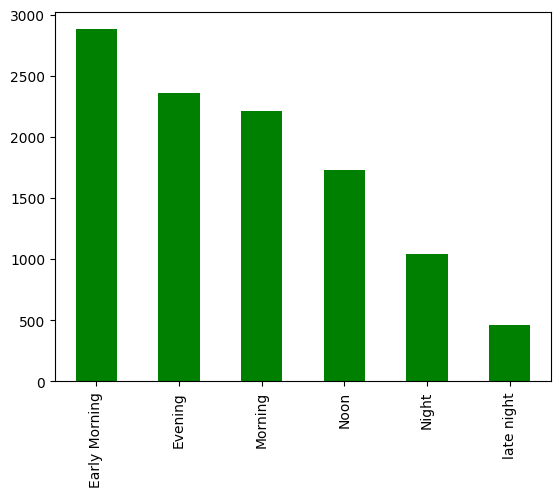

In [30]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

Conclusion- Mostly there are higher number of flights in early morning

In [36]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

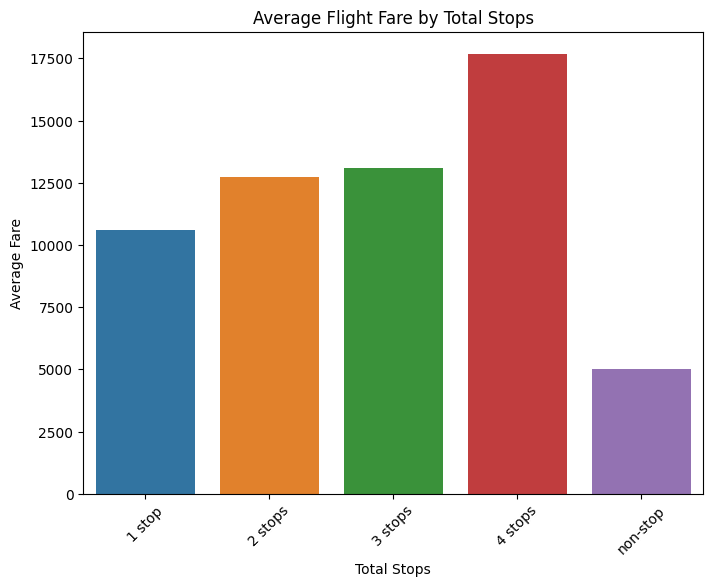

In [37]:
# Calculate average flight fare for each 'Total_Stops' category
avg_fare_by_stops = data.groupby('Total_Stops')['Price'].mean()

# Create a bar plot to visualize average fare by stops
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fare_by_stops.index, y=avg_fare_by_stops.values)
plt.title('Average Flight Fare by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)
plt.show()


Conclusion- non-stop flight has lower fare

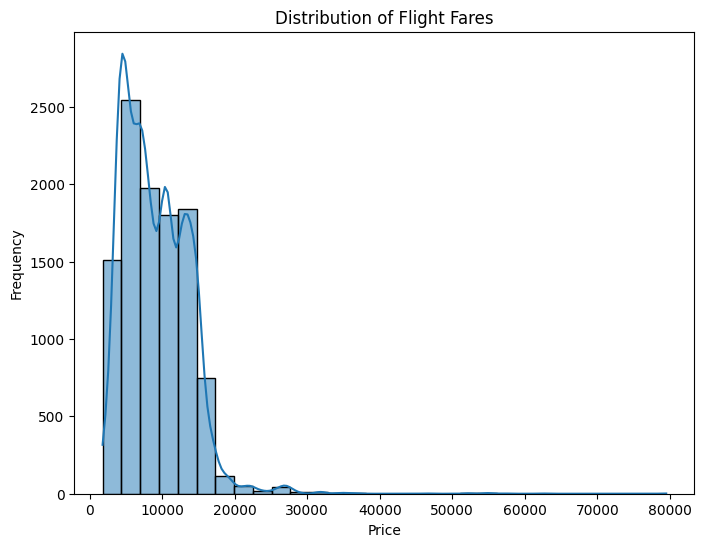

In [38]:
# Create a histogram to visualize the distribution of flight fares
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Fares')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Conclusion-  The histogram shows the distribution of flight fares, and it appears to be right-skewed. This means that most flight fares are concentrated towards the lower end, with fewer flights having significantly higher fares.

## 6.. Pre-process Duration Feature & extract meaningful features from it..

### Lets Apply pre-processing on duration column,
    -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it contains string values ,
    thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

In [39]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [40]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [41]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
'''
    Now after pre-processing duration feature , still my ml_model is not able to understand duration
    bcz it is string data so any how we have to convert it into numerical(integer of float) values

'''

In [42]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [43]:
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [44]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25


## 7.. Lets Analyse whether Duration impacts Price or not ?

In [45]:
data['Duration'] ## convert duration into total minutes duration ..

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [46]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [47]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

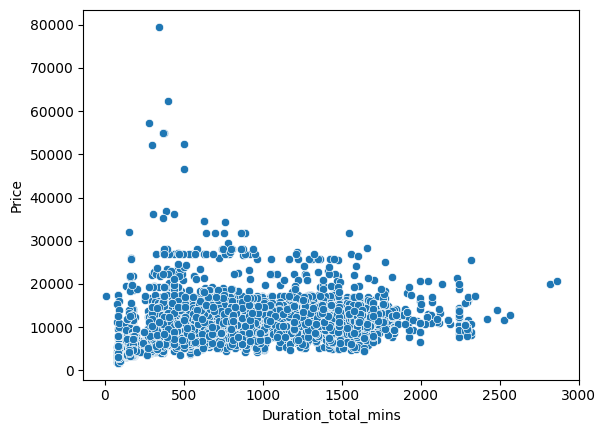

In [48]:
## Using scatterplot to visualize the duration_total_mins vs Price

sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

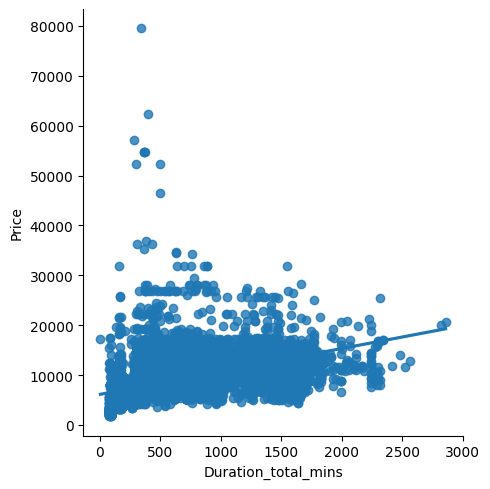

In [49]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

## Conclusion- pretty clear that As the duration of minutes increases Flight price also increases.

Conclusion- pretty clear that As the duration of minutes increases Flight price also increases.


In [ ]:
### lets understand whether total stops affect price or not !

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

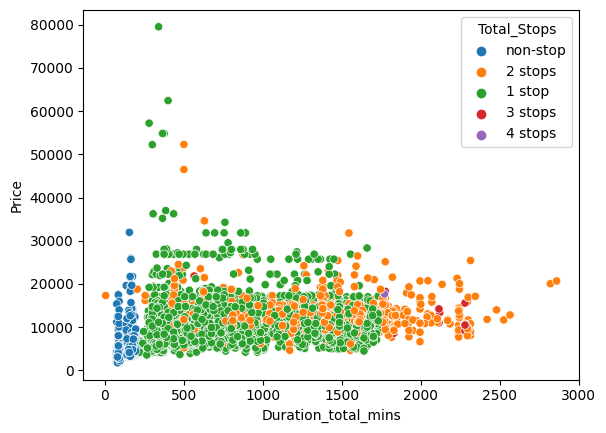

In [50]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)

In [ ]:
'''
Non stops flights take less duration while their fare is also low, then as the stop increases,
duration also increases and price also increases(in most of the cases)

'''

## 8.. on which route Jet Airways is extremely used?

In [51]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Conclusion- On Route
CCU → BOM → BLR highest Jet Airways runs

### b.. Performing Airline vs Price Analysis..

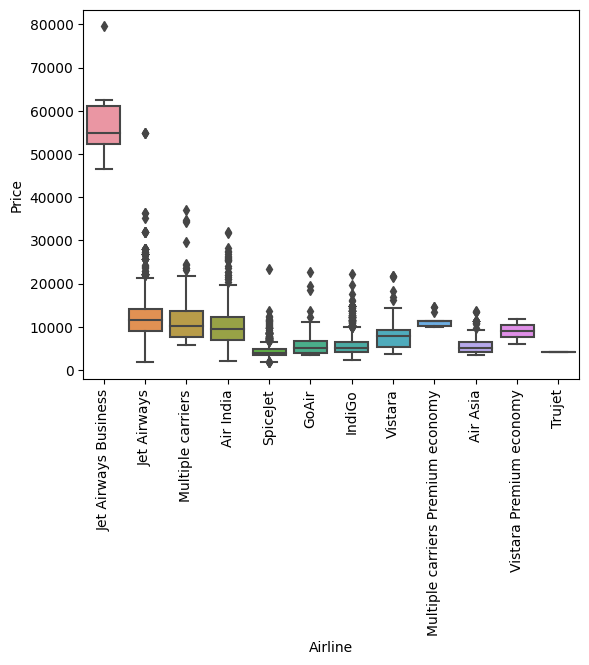

In [52]:
sns.boxplot(y='Price' , x='Airline' , data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

Conclusion--> From graph we can see that Jet Airways Business have the highest Price.,
              Apart from the first Airline almost all are having similar median

## 9.. Applying one-hot Encoding on data..

In [53]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [54]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

#### Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case
    
    But in real-world , it is not necessary that u have to always One-hot or label ,
    hence we will discuss more interesting approaches in upcoming sessions to do this !

In [55]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
### Applying One-hot from scratch :

In [56]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [57]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [58]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


We have converted 'Source' column which is a categorical coulmn to Source_Banglore,	Source_Kolkata,	Source_Delhi,	Source_Chennai,	Source_Mumbai columns to numerical columns as it is understood my ML

## 10.. Lets Perform target guided encoding on Data
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [ ]:
'''

Now on 2 features , Airline & Destination , we can apply on-hot as there is no such order
but total_stops is my ordinal data , it makes no sense if we apply on-hot on top of this..
similarly if we have any feature which have more categories , it is not good to apply one-hot as it will create
curse of dimensionality issue , which leads to usage of more resources of your pc..

So we can think for appplying mean Encoding or better techniques like Target Guided Ordinal Encoding !


'''

In [59]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [62]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [63]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [64]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [65]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [66]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [67]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [68]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
### now lets perform Target Guided Mean encoding on 'Destination' ..

In [69]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
'''

till now,Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar)
which is neighbouring part of Delhi so we will consider New Delhi & Delhi as same

but in future , these conditions may change..


'''

'\n\ntill now,Delhi has only one Airport which is IGI & its second Airport is yet to build in Greater Noida (Jewar) \nwhich is neighbouring part of Delhi so we will consider New Delhi & Delhi as same\n\nbut in future , these conditions may change..\n\n\n'

In [70]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [71]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
#### now lets perform Target Guided Mean encoding on 'Destination'

In [72]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [73]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [74]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [75]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [76]:
data['Destination'] = data['Destination'].map(dict_dest)

In [77]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,...,4,25,19,0,1140,0,0,1,0,0


Conclusion- We have applied Target Guided Ordinal Encoding for on 2 features , Airline & Destination for best understanding of ML

## 11.. Perform Label(Manual) Encoding on Data

In [79]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
# As this is case of Ordinal Categorical type we perform Label encoding from scratch !
# Here Values are assigned with corresponding key

In [80]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [81]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [82]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [83]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0


Conclusion- As we can see above table that manual encoding is implemented in Total_stop column

### b.. Remove Un-necessary features

In [84]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [85]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [ ]:
'''

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "journey_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Lets drop "Source" feature as well as we have already perform feature encoding on this Feature
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2019..

'''

In [86]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [87]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [88]:
data.drop(columns=['Route'] , axis=1 , inplace=True)

## we can drop Route as well bcz Route is directly related to Total stops & considering 2 same features doesnt make sense while building ML model..

In [89]:
data.drop(columns=['Duration'] , axis=1 , inplace=True)

## we can drop "Duration" feature as we have extracted "Duration hour" & "Duration Minute"..

In [90]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


## 12.. Lets Perform outlier detection !

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.


In [91]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

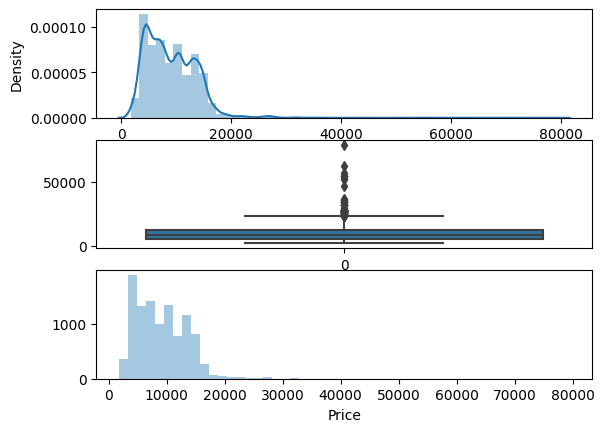

In [92]:
plot(data , 'Price')

        If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
        where ,  IQR = 75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR
          


In [93]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [94]:
print([price for price in data['Price'] if price> maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


### b.. How to deal with Outlier

In [95]:
### wherever I have price >35K just replace replace it with median of Price

data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

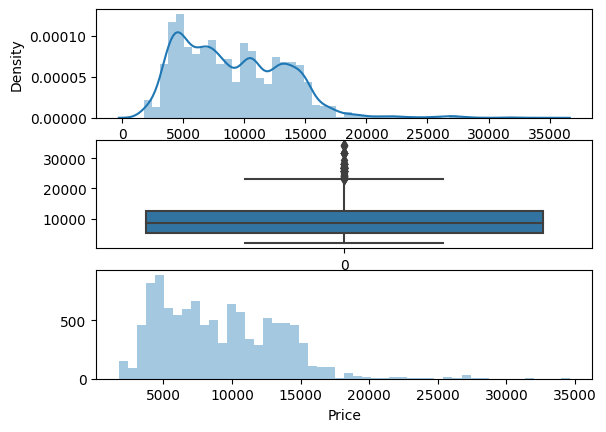

In [96]:
plot(data , 'Price')

## 13.. Lets Perform feature selection

In [ ]:
'''
    : Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable.


    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features

'''

In [97]:
X = data.drop(['Price'] , axis=1)

In [98]:
y = data['Price']

In [100]:
# doing feature selection by importing mutual_info_regression

from sklearn.feature_selection import mutual_info_regression

In [101]:
imp = mutual_info_regression(X , y)

In [ ]:
'''
Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables.
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.

'''


In [102]:
imp

array([0.97589617, 0.9987389 , 0.78990001, 0.20555225, 0.2347584 ,
       0.32437   , 0.25785245, 0.39016485, 0.33704007, 0.47044958,
       0.3325239 , 0.38731311, 0.45541377, 0.51836008, 0.13374406,
       0.20717622])

In [103]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [104]:
imp_df.columns = ['importance']

In [105]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,0.998739
Airline,0.975896
Total_Stops,0.789900
Source_Delhi,0.518360
Duration_hours,0.470450
Source_Kolkata,0.455414
Arrival_Time_hour,0.390165
Source_Banglore,0.387313
Arrival_Time_minute,0.337040
Duration_mins,0.332524


Conclusion- Above list tell us that how each and every feature in feature selection is important for ex- Destination feature has importance of 99%

## 14.. Lets Build ML model

#### split dataset into train & test

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:

    a..Initially ,lets build basic random model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will try to improve it..
    d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [108]:
# we are building Random Forest Regressor model
#Random Forest Regressor is a machine learning algorithm used for regression tasks.
# It is an ensemble learning method that combines the predictions from multiple decision trees to make accurate predictions
#  It leverages the power of ensemble learning, combining the predictions of multiple trees to reduce variance and improve model stability.



from sklearn.ensemble import RandomForestRegressor

In [110]:
ml_model = RandomForestRegressor()

In [111]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [112]:
y_pred = ml_model.predict(X_test)

In [113]:
y_pred

array([16738.29,  6337.41,  8870.18, ...,  3591.58,  6302.5 ,  6962.3 ])

In [ ]:
# checking the accuracy of the model

In [114]:
from sklearn import metrics

In [115]:
metrics.r2_score(y_test , y_pred)

0.8044288150513095

Conclusion- Random Forest Regressor has 80% accuracy

##. Automate ml pipeline & How to define your Evaluation metric..

### a.. how to make our own metric...

In [122]:
# Mean Absolute Percentage Error
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [118]:
mape(y_test , y_pred)

13.218170200497143

### b.. How to automate ml pipeline !

In [ ]:
'''

    Lets automate all the stuffs..
    let say ,I will just pass ml algo & i get several results like--

    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error
1. Training Score: A metric indicating how well a machine learning model fits the training data.
2. Predictions: The model's estimated outcomes or values for a given set of input data.
3. R2 Score (R-squared): A measure of how well the model explains the variance in the target variable.
4. MSE (Mean Squared Error): The average of squared differences between predicted and actual values, quantifying prediction accuracy.
5. MAE (Mean Absolute Error): The average of absolute differences between predicted and actual values, measuring prediction errors.
6. RMSE (Root Mean Squared Error): The square root of the MSE, providing a measure of prediction error in the original unit of the target variable.
7. MAPE (Mean Absolute Percentage Error): The average of absolute percentage differences between predicted and actual values, assessing prediction accuracy as a percentage.
8. Distribution of Error: The pattern or spread of prediction errors across the dataset, indicating how well the model performs across different data points.


'''

In [119]:
from sklearn import metrics

In [120]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9517397962591458
predictions are : [16776.58  6288.55  8842.4  ...  3550.96  6297.39  6983.68]


r2 score : 0.8078377335653851
MAE : 1182.8771126095814
MSE : 3740938.073750806
RMSE : 1934.1504785695465
MAPE : 13.23487408079796


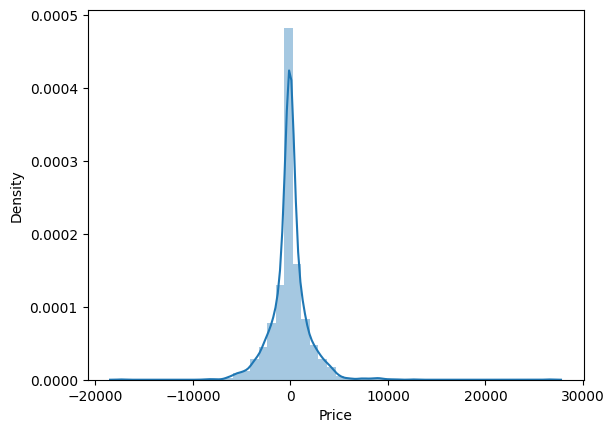

In [121]:
predict(RandomForestRegressor())

Creating Second Model - Decision Tree Model


In [124]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  6976.  8610. ...  3419.  5797.  6818.]


r2 score : 0.6960181640322217
MAE : 1367.8235367527768
MSE : 5917796.6881831605
RMSE : 2432.65219219336
MAPE : 15.106527565435337


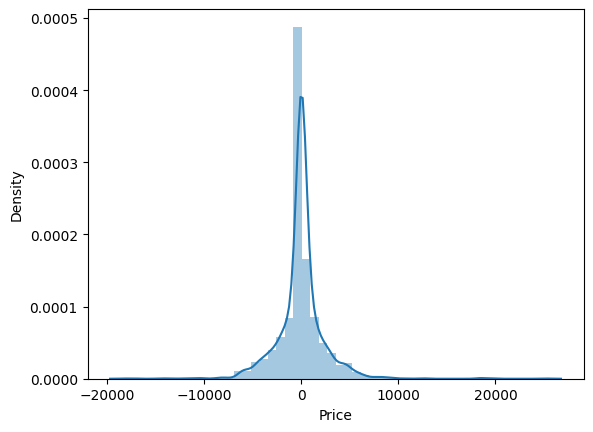

In [125]:
predict(DecisionTreeRegressor())

Which Evaluation metrics should be consider for a positive business impact and why?

When evaluating a machine learning model for predicting ticket fare prices in the context of a business impact, it's important to consider evaluation metrics that align with the specific goals and requirements of the business. The choice of evaluation metrics can have a significant impact on decision-making and the success of the project. Here's an assessment of the metrics provided and their relevance to a positive business impact:

1. **R2 Score (Coefficient of Determination):**
   - R2 score measures the proportion of the variance in the dependent variable (ticket fare prices) that is predictable from the independent variables (features) in model.
   - A high R2 score of 0.8078 (approximately 81%) suggests that a significant portion of the variance in ticket fare prices is explained by model's features.
   - Positive Business Impact: A high R2 score indicates that model is effective at capturing the underlying patterns in the data, which is valuable for business decision-making. It implies that the model contributes positively to understanding and predicting ticket fare prices.

2. **Mean Absolute Error (MAE):**
   - MAE measures the average absolute difference between model's predictions and the actual ticket fares. It provides a straightforward interpretation of prediction error.
   - An MAE of 1182.88 suggests that, on average,  model's predictions have an absolute error of approximately 1182.88 currency units.
   - Positive Business Impact: A low MAE indicates that model's predictions are relatively close to the actual fare prices. This can lead to more accurate pricing recommendations for customers, potentially increasing customer satisfaction and loyalty.

3. **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):**
   - MSE measures the average squared difference between predictions and actual values. RMSE is the square root of MSE and is in the same unit as the target variable.
   - MSE: 3,740,938.07, RMSE: 1934.15
   - Positive Business Impact: Lower MSE and RMSE values indicate that model's predictions are closer to the actual fares on average. This can lead to more accurate pricing strategies, reducing the potential for underpricing or overpricing, which can positively impact revenue and profitability.

4. **Mean Absolute Percentage Error (MAPE):**
   - MAPE measures the percentage difference between predictions and actual values, providing insight into prediction accuracy as a percentage of actual fares.
   - MAPE: 13.23%
   - Positive Business Impact: A low MAPE indicates that model's percentage prediction errors are relatively small. This can be important for businesses that rely on accurate pricing, as it helps in setting competitive fares and managing revenue effectively.

In summary, the evaluation metrics you've considered, including R2 score, MAE, MSE, RMSE, and MAPE, are all relevant for assessing the performance of ticket fare prediction model from a business perspective. These metrics collectively provide insights into prediction accuracy, model fit, and the potential positive impact on revenue, customer satisfaction, and pricing strategies. The choice of specific metrics may depend on the business's priorities and objectives.

In [ ]:
# Which ML model did you choose from the above created models as your final prediction model and why?

ANSWER- I had choosen Random Forest Regressor model as my final model.

Here's a brief interpretation of the output metrics provided for  Random Forest Regressor model:

1. **Training Score (R2 Score)**: The training score measures how well the model fits the training data. In your case, the R2 score is approximately 0.9517, which indicates that your model explains about 95.17% of the variance in the training data. A high R2 score suggests a good fit to the training data.

2. **Predictions**: These are the predicted values for the target variable (flight fares) for the dataset you used for evaluation. Each value in the list corresponds to a prediction for a specific data point.

3. **R2 Score (Test Set)**: The R2 score on the test set (or validation set) is approximately 0.8078. This score represents how well your model generalizes to new, unseen data. An R2 score of 0.8078 indicates that your model explains about 80.78% of the variance in the test data, which is quite good.

4. **MAE (Mean Absolute Error)**: The MAE is approximately 1182.88. It represents the average absolute difference between your model's predictions and the actual flight fares in the test set. Lower MAE values indicate better prediction accuracy.

5. **MSE (Mean Squared Error)**: The MSE is approximately 3,740,938.07. It is the average of the squared differences between your model's predictions and the actual values in the test set. MSE gives more weight to larger errors.

6. **RMSE (Root Mean Squared Error)**: The RMSE is approximately 1934.15. It is the square root of the MSE and is measured in the same units as the target variable. RMSE is a more interpretable measure of error and provides an estimate of the average prediction error.

7. **MAPE (Mean Absolute Percentage Error)**: The MAPE is approximately 13.23%. It calculates the average percentage difference between your model's predictions and the actual values. MAPE is useful for understanding prediction accuracy in terms of percentage errors.

Overall, Random Forest Regressor model seems to perform well as compare to normal decision tree model. It has a high training score, indicating a good fit to the training data, and it generalizes reasonably well to the test data based on the R2 score. The MAE and RMSE values provide insights into the magnitude of prediction errors, and the MAPE gives a sense of the error in terms of percentages. These metrics suggest that your model is effective at predicting flight fares.

###. Hypertune ml model

In [ ]:
## how to select which ML algo we should apply for
## ans is use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics
## & based on domain expertise knowledge Then I can say ya this model perfoms best

### Hyperparameter Tuning or Hyperparameter Optimization
    1.Choose following method for hyperparameter tuning
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV--> Slower way to hypertune my model
    2.Choose ML algo that u have to hypertune
    2.Assign hyperparameters in form of dictionary or create hyper-parameter space
    3.define searching &  apply searching on Training data or  Fit the CV model
    4.Check best parameters and best score

In [126]:
from sklearn.model_selection import RandomizedSearchCV

In [127]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [128]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [129]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [130]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators ,
    'max_features' : max_features ,
    'max_depth' : max_depth ,
    'min_samples_split' : min_samples_split
}

In [131]:

## Define searching

# Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [132]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [ ]:
#### In your case , may be your parameters may vary a little bit , thats not a major issue..

In [134]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='auto', min_samples_split=5,
                      n_estimators=320)

In [135]:
rf_random.best_score_

0.8209868018727082

A cross-validation score of 0.8209 is relatively high, which suggests that the model with the selected hyperparameters performs well on average across different cross-validation folds. This means that, on average, the model explains approximately 82.09% of the variance in your target variable, or it has low prediction error, depending on the specific metric used.

**Conclusion**

1- Mostly there are higher number of flights in early morning.

2- On Route CCU → BOM → BLR highest Jet Airways runs, Jet Airways Business have the highest Price.

3- Non stops flights take less duration while their fare is also low, then as the stop increases,
duration also increases and price also increases(in most of the cases)

4- Model Effectiveness: The Random Forest Regressor model achieved a high training score of approximately 95%, indicating its ability to capture complex relationships within the dataset.

5- Prediction Accuracy: The model's predictions closely align with actual ticket fare prices, as evidenced by a low Mean Absolute Error (MAE) of approximately 1182.88. This means that, on average, the model's predictions are within this range of the true ticket fares.

6- Variance Explained: The R-squared (R2) score of approximately 81% demonstrates that a significant portion of the variance in ticket fare prices is explained by the model's features. This indicates a strong capability to understand and predict pricing patterns.

7- Hyperparameter Tuning: The model's hyperparameters were fine-tuned using techniques such as RandomizedSearchCV, resulting in improved performance with an R2 score of approximately 82%.